**Time Series Analysis**

Data that changes over period of time are termed as Time Series information. Simple example for this is Temperature over time, Number of visits to a website over a period of time and so on.

Characteristics of Time Series Data:

1. **Trend**: Defined direction of growth/decay of time series data.
2. **Seasonality**: Repeated occurence of trend in Time Series data.
3. **Autocorrelation**: Sudden decay/growth of time series data due to some event. 
4. **Noise**: Random perturbation in the growth/decay.






In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format="-",start=0,end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

def trend(time, slope=0):
  return slope * time

def season_pattern(season_time):
  return np.where(
      season_time < 0.4,
      np.cos(season_time*2*np.pi),
      1/np.exp(3*season_time)
  )

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase)%period)/period
  return amplitude * season_pattern(season_time)

def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

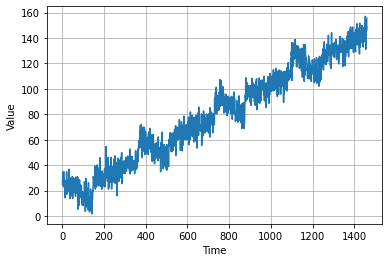

In [3]:
time = np.arange(4*365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.05)
amplitude = 15
slope = 0.09
noise_level = 6

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

series += noise(time, noise_level, seed=42)
plot_series(time,series)

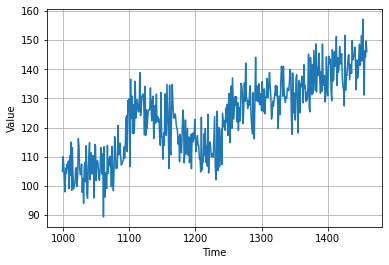

In [8]:
x_valid = series[split_time - 1:-1]
plot_series(time[split_time - 1:-1], x_valid)

**Naive Forecast**

Use value from t-1 and assign to t time.

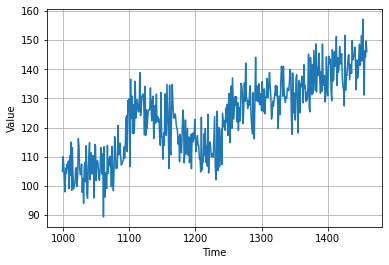

In [7]:

split_time = 1000
naive_forecast = series[split_time - 1:-1]
plot_series(time[split_time - 1:-1],naive_forecast)

**Moving Average**

Take average of the last (t-n) time window to compute value at t

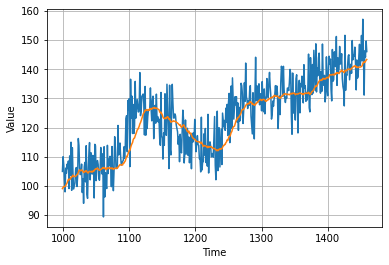

In [9]:
def moving_average_forecast(series, window_size):
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

moving_avg = moving_average_forecast(series, 30)[split_time - 30:]
plot_series(time[split_time - 1:-1], x_valid)
plot_series(time[split_time - 1:-1], moving_avg)

**Moving Average Analysis**

Use seasonality in time series. Subtract value at t-365 from t.

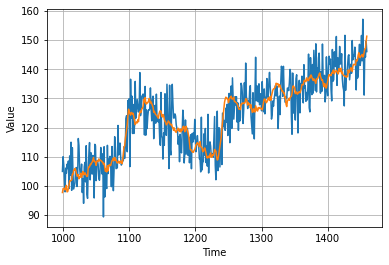

In [13]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg
plot_series(time[split_time - 1:-1], x_valid)
plot_series(time[split_time - 1:-1], diff_moving_avg_plus_smooth_past)